In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [20]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [21]:
df.shape

(3554, 18)

In [22]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [23]:
latlong = pd.read_csv('latlong.csv')

In [24]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [25]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [26]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [27]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [28]:
new_df = df.merge(latlong, on='sector')

In [29]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [31]:
group_df = new_df.groupby('sector')[['price','price_per_sqft','built_up_area','latitude','longitude']].mean()

In [32]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [33]:
new_df.to_csv('data_viz1.csv',index=False)

In [34]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [35]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 56 Gurgaon,flat,kiran residency,1.50,6648.0,2256.0,Built Up area: 2250 (209.03 sq.m.),3,5,3+,"pooja room,study room","000, Sector 56 Gurgaon, Gurgaon, Haryana",4.0,South-East,5 to 10 Year Old,"['Sector metro station', 'Sector metro station...",Brokers please excuse\n3 bhk study room pooja ...,"['3 Wardrobe', '1 Water Purifier', '4 Fan', '1...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
1,3 BHK Flat in Sector 86 Gurgaon,flat,dlf the skycourt,1.55,8031.0,1930.0,Super Built up area 1930(179.3 sq.m.)Built Up ...,3,3,3,not available,"Sector 86 Gurgaon, Gurgaon, Haryana",5.0,South,1 to 5 Year Old,"['Sapphire 83 Mall', 'NH-8, Imt Manesar', 'Rao...","Dlf skycourt , new gurgaon\nReady to move\nPar...","['1 Fan', '1 Wardrobe', 'No AC', 'No Bed', 'No...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area5 out of 5', 'Construction5 out of..."
2,2 BHK Flat in Sector 95 Gurgaon,flat,ramsons kshitij,0.33,3911.0,844.0,Super Built up area 767(71.26 sq.m.),2,2,1,others,"Sector 95 Gurgaon, Gurgaon, Haryana",14.0,South,0 to 1 Year Old,"['Bangali Clinic', 'Yadav Clinic', 'Dr. J. S. ...",Corner flat with private balcony. The property...,"['2 Bed', '1 Wardrobe', '3 Fan', '1 Exhaust Fa...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area4 out of 5', 'Amenities4 out of 5'..."
3,4 BHK Flat in Sector 56 Gurgaon,flat,the castle society,2.00,8695.0,2300.0,Super Built up area 2300(213.68 sq.m.),4,4,2,not available,"Sector 56 Gurgaon, Gurgaon, Haryana",4.0,NaN,By 2023,"['Sector 54 chowk metro station', 'Sector metr...",We are the proud owners of this 4 bhk apartmen...,[],NaN,"['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,2 BHK Flat in Sohna,flat,signature global park,0.54,7248.0,745.0,Carpet area: 745 (69.21 sq.m.),2,1,3,not available,"J-26, Sohna, Gurgaon, Haryana",1.0,NaN,Within 6 months,"['Sector 55-56 metro', 'Global city centre', '...",Park facing property for the unique view,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Connectivity5 out of 5', 'Management4 out of..."


In [36]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [37]:
wordcloud_df.head()

,features,sector
0,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 36
1,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 89
2,"['Feng Shui / Vaastu Compliant', 'Security / F...",sohna road
3,NaN,sector 92
4,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 102


In [38]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [39]:
main

['Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Water purifier',
 'High Ceiling Height',
 'Maintenance Staff',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Visitor Parking',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Internet/wi-fi connectivity',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Shopping Centre',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Water softening plant',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Swimming Pool',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Rain Water Harvesting',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire 

In [40]:
from wordcloud import WordCloud

In [41]:
feature_text = ' '.join(main)

In [42]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [43]:
feature_text

'Security / Fire Alarm Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Water purifier High Ceiling Height Maintenance Staff Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Visitor Parking Park Security Personnel Natural Light Internet/wi-fi connectivity Airy Rooms Spacious Interiors Low Density Society Shopping Centre Waste Disposal Rain Water Harvesting Water softening plant Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Swimming Pool Water Storage Park Visitor Parking Shopping Centre Fitness Centre / GYM Rain Water Harvesting Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Swimming Pool Water Storage Park Visitor Parking Fitness Centre / GYM Club house / Community Center Centrally Air Conditioned Water

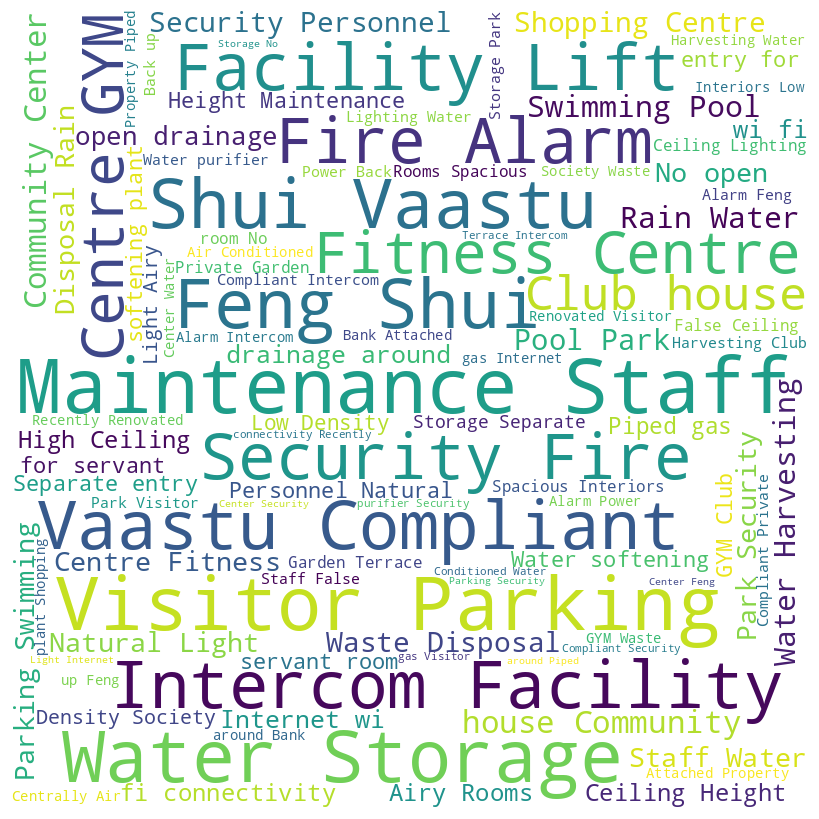

In [44]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [45]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [46]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [47]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [48]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


/tmp/ipykernel_604320/3761596323.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_604320/3761596323.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

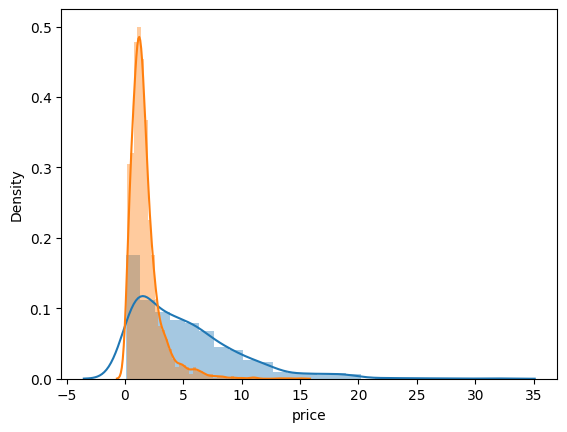

In [49]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [50]:
new_df['sector'].unique().tolist().insert(0,'overall')